<a href="https://colab.research.google.com/github/HimanshuJanbandhu/Knowledge-Base-Project/blob/main/KG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pd.set_option('display.max_colwidth', 200)



In [ ]:
inputText = "Throughout the 1930s, Mercedes-Benz produced the 770 model, a car that was notably popular throughout Germany's Nazi period. Adolf Hitler was known to have driven in a model of this car during his time in power, with modified custom bulletproof windshields.[15] Most of the currently surviving 770 models were sold at auctions to private buyers. One of the cars is currently on display at the War Museum in Ottawa, Ontario.\
    The pontiff's Popemobile has often been sourced from Mercedes-Benz\
    Mercedes-Benz normally has a strong reputation for quality and durability. Their objective measures looking at passenger vehicles, such as J. D. Power surveys, demonstrated a downturn in reputation in these criteria in the late 1990s and early 2000s.\
    By mid-2005, Mercedes temporarily returned to the industry average for initial quality, a measure of problems after the first 90 days of ownership, according to J. D. Power.[51] In J. D. Power's Initial Quality Study for the first quarter of 2007, Mercedes showed dramatic improvement by climbing from 25th to 5th place and earning several awards for its newer models.[52] \
    For 2008, Mercedes-Benz's initial quality rating improved by yet another mark, to 4th place.[53] On top of this accolade, it also received the Platinum Plant Quality Award for their Mercedes branded Sindelfingen, Germany body assembly plant.[53] J. D. Power's 2011 US Initial Quality and Vehicle Dependability Studies both ranked Mercedes-Benz vehicles above average in build quality and reliability.[54][55] In J. D. Power's United Kingdom Survey in 2011, Mercedes cars were rated above average.[56] Additionally, iSeeCars.com study for Reuters in 2014 found Mercedes to have the lowest vehicle recall rate out of competitor\
    Mercedes-Benz has been producing buses since 1895 in Mannheim, Germany. Since 1995, the brands of Mercedes-Benz's buses and coaches are under the umbrella of EvoBus GmbH, since December 2021 belonging to Daimler Truck AG. EvoBus, through its regional subsidiaries, markets them in European countries, while in other regions of the world marketing and sales duties are passed to regional subsidiaries of Daimler Truck. Mercedes-Benz produces a wide range of buses and coaches, mainly for Europe and Asia. The first model was produced by Karl Benz in 1895"

# inputText = "I am writing code. I am drinking water. I sing a song. I look at you. He also drinks."

In [ ]:
# Subject Verb Object detection


class KnowledgeExtraction:

    @staticmethod
    def appendChunk(original, chunk):
      return original + ' ' + chunk
    
    @staticmethod
    def isRelationCandidate(token):
      deps = ["ROOT"]
      return any(subs in token.dep_ for subs in deps)

    @staticmethod
    def isConstructionCandidate(token):
      deps = ["compound", "prep", "conj", "mod",'nsubj']
      return any(subs in token.dep_ for subs in deps)

    @staticmethod
    def printToken(token):
      print(token.text, "->", token.dep_)

    def retrieveKnowledge(self, textInput):

        nlp = spacy.load('en_core_web_sm')
        nlp.add_pipe(nlp.create_pipe('sentencizer'))
        document = nlp(textInput)

        # matcher = Matcher(nlp.vocab)
        # define the pattern 
        # pattern = [{'DEP':'nsubj', 'OP':'+'},
        # {'DEP':'ROOT', 'OP':'+'}, 
        # {'DEP':'dobj', },
        # {'DEP':'pobj', 'OP':'?'}
        # ] 
        # matcher.add("matching_1", None, pattern) 
        # matches = matcher(text)
        # for i in range(len(matches)):
        #   span = text[matches[i][1]:matches[i][2]] 
        #   print(span.text)
        triples = []
        for sent in document.sents:
          print(sent.string.strip())
          tokens = nlp(sent.string.strip())
          subject = ''
          object = ''
          relation = ''
          subjectConstruction = ''
          objectConstruction = ''
          for token in tokens:
            #print(token.text, "-->",token.dep_,"-->", token.pos_)
            #KnowledgeExtraction.printToken(token)
            if "punct" in token.dep_:
              continue
            if KnowledgeExtraction.isRelationCandidate(token):
              relation = KnowledgeExtraction.appendChunk(relation, token.lemma_)
            if KnowledgeExtraction.isConstructionCandidate(token):
              if subjectConstruction:
                subjectConstruction = KnowledgeExtraction.appendChunk(subjectConstruction, token.text)
              if objectConstruction:
                objectConstruction = KnowledgeExtraction.appendChunk(objectConstruction, token.text)
            if "subj" in token.dep_:
              subject = KnowledgeExtraction.appendChunk(subject, token.text)
              subject = KnowledgeExtraction.appendChunk(subjectConstruction, subject)
              subjectConstruction = ''
            if "obj" in token.dep_:
              object = KnowledgeExtraction.appendChunk(object, token.text)
              object = KnowledgeExtraction.appendChunk(objectConstruction, object)
              objectConstruction = ''
          print (subject.strip(), ",", relation.strip(), ",", object.strip())
          triples.append((subject.strip(), relation.strip(), object.strip()))
        return triples


# obj = KnowledgeExtraction()
# triples = obj.retrieveKnowledge(inputText)
# print(triples)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='skyblue', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

Throughout the 1930s, Mercedes-Benz produced the 770 model, a car that was notably popular throughout Germany's Nazi period.
Benz that , produce , 1930s model period
Adolf Hitler was known to have driven in a model of this car during his time in power, with modified custom bulletproof windshields.[15]
Hitler bulletproof , know , model car time power
Most of the currently surviving 770 models were sold at auctions to private buyers.
Most , sell , models auctions buyers
One of the cars is currently on display at the War Museum in Ottawa, Ontario.
One , be , cars display Museum Ottawa

 ,  , 
The pontiff's Popemobile has often been sourced from Mercedes-Benz    Mercedes-Benz normally has a strong reputation for quality and durability.
Popemobile , source , Benz reputation quality
Their objective measures looking at passenger vehicles, such as J. D. Power surveys, demonstrated a downturn in reputation in these criteria in the late 1990s and early 2000s.
measures , demonstrate , vehicles su

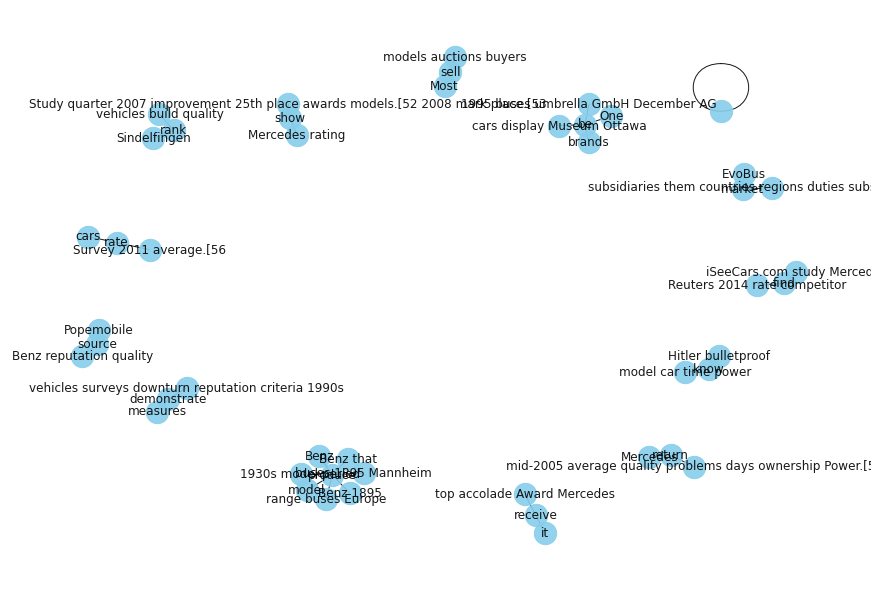

In [ ]:
obj = KnowledgeExtraction()
triples = obj.retrieveKnowledge(inputText)
printGraph(triples)

In [ ]:



obj = KnowledgeExtraction()
triples = obj.retrieveKnowledge(inputText1)
printGraph(triples)

SyntaxError: ignored